# Question 2: Does distance from the city have an affect on House Price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

import folium
from folium.plugins import MarkerCluster # for clustering the markers

In [2]:
df = pd.read_csv('~/flatiron/mod2/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/csv/datawithnewcols.csv',index_col = 0)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price','distance_from_a_city']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.drop(all_indices, axis=0,inplace = True)

KeyError: '[  273   290   548   716  1010  1466  1513  1589  1878  1962  2033  2103\n  2244  2505  3706  3744  3843  3857  4402  5494  5694  6070  6166  6187\n  6261  6418  7044  7543  7743  8352  8443  8463  9101  9114  9203  9603\n  9631 10389 10397 10429 11339 11650 12400 12814 12928 13355 14015 14172\n 14188 14272 14313 14475 14818 14843 14934 15838 15848 16288 16468 16719\n 17035 17052 17128 17538 17586 17590 18036 18061 18607 18875 18965] not found in axis'

In [6]:
df.reset_index(drop=True,inplace = True)

# Looking at different visualisation for price vs distance from city

KeyboardInterrupt: 

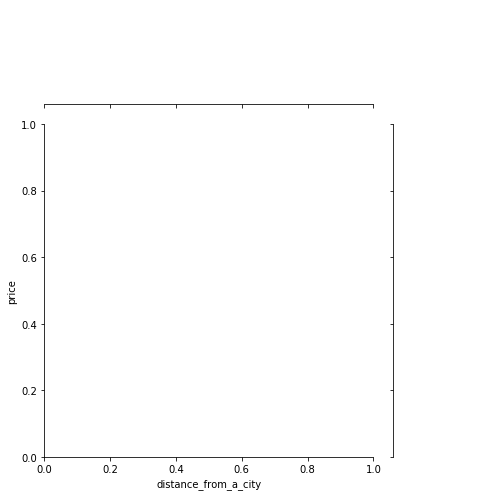

In [7]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'kde', height = 7, 
              color = 'b', ratio = 3)


In [ ]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)


In [ ]:
df.columns

In [ ]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, color='b').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

**Here it is clear that houses above 1milllion are located withing 20km of the City**

# Distance from Bellevue

In [ ]:
mp = folium.Map(location=[47.610378, -122.200676], zoom_start=10)

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(mp) # create marker clusters
for i in range(df.shape[0]):
    location = [df['lat'][i],df['long'][i]]
    tooltip = f"House ID: {df['id'][i]}"

    folium.Marker(location=location,tooltip=tooltip).add_to(marker_cluster)

folium.Circle([47.610378, -122.200676],
                    radius=10000
                   ).add_to(mp)
folium.Circle([47.610378, -122.200676],
                    radius=15000).add_to(mp)


mp.save(outfile = '../maps/my_map_radius.html')

In [ ]:
from IPython.display import Image


In [ ]:
Image(filename = '../Images/mapwithradius.png', width=1000, height=1000)

In [ ]:
ax = sns.jointplot(x='distance_from_bellevue',y='price',data=df, kind = 'hex', height = 7, 
              color = 'r', ratio = 3)
ax.set_axis_labels("Distance from Bellevue in km","Price")
cbar_ax = ax.fig.add_axes()  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

In [ ]:
ax = sns.jointplot(x='distance_from_bellevue',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue in km","Price")

In [ ]:
sns.scatterplot(x='distance_from_bellevue',y='price',data=df)

In [ ]:
ax = sns.jointplot(x='distance_from_bellevue',y='sqft_living',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue","Sqft Living")

In [ ]:
ax = sns.jointplot(x='bathrooms',y='price',data=df, kind = 'reg', height = 7, 
              color = 'b', ratio = 3)
ax.set_axis_labels("Distance from Bellevue","Sqft Living")

In [ ]:
sns.catplot(x='bathrooms',y='price',data=df)

In [ ]:
df.groupby(['bathrooms','bedrooms'])['price'].agg(['mean','median'])

# Distance from Seattle

# Perform a Single Variable Regression using distance from a city 

In [ ]:
X1 = df['distance_from_a_city']
y1 = df['price']


In [ ]:
X1 = sm.add_constant(X1)

In [ ]:
model = sm.OLS(y1,X1).fit()
model.summary()

In [ ]:
model.params

In [ ]:
print(model.summary())

# Conclusion

* An increase in 1km from the city results in a decrease in price by  USD 12,264

* It is clear that houses above 1milllion are located withing 20km of Bellevue

* It is clear that the distance of the house from a city affects the house price